# Regression between sea level height and the nearest wind stress data point

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [35]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs
from code import practical_functions as pf

data_type = 'era5'
model = 'NearestPoint'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [36]:
# Open data file
tg_data = imprt.import_obs_slh_data()

In [37]:
tg_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
time,,,,,,,
1890,-13.213259,-14.166181,-8.973137,-13.026188,-9.377363,-15.171036,-12.321191
1891,-16.183386,-13.841866,-5.759001,-10.815760,-7.565391,-11.451732,-10.936208
1892,-16.236881,-10.900375,-5.826693,-10.986799,-6.835037,-8.314762,-9.850130
1893,-13.756411,-11.823811,-3.957280,-6.719991,-5.267145,-3.741717,-7.544446
1894,-8.928481,-12.998235,-4.236016,-10.100298,-4.946798,-4.318264,-7.588078
...,...,...,...,...,...,...,...
2015,15.157874,19.020343,14.241575,20.498794,17.143344,15.329365,16.898612
2016,15.472328,19.235269,12.357366,17.014900,13.459319,14.644716,15.364048
2017,17.029377,21.390915,16.210442,22.767040,18.011848,17.599097,18.834846


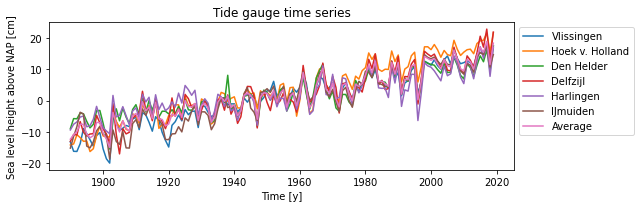

In [38]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [39]:
wind_data = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [40]:
wind_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1950,4.733644,6.345675,9.164554,2.814705,7.602190,7.574831,6.372600,2.731458,3.180596,3.728501,1.950656,3.185383,3.380980,3.026262
1951,2.215220,3.094227,5.129766,1.345894,4.254703,3.909268,3.324846,4.189133,4.875644,6.217201,2.589350,4.982398,5.261225,4.685825
1952,3.140214,4.201388,7.262647,2.741641,6.585569,5.366155,4.882936,0.754191,0.748247,0.540864,0.799019,0.620607,0.670609,0.688923
1953,2.692977,3.829823,6.808114,2.271224,5.938963,4.985612,4.421119,1.657496,1.953852,2.634877,1.285330,2.170539,2.212620,1.985786
1954,8.065403,10.580028,14.525902,3.746828,11.332446,12.414601,10.110868,1.852473,2.051144,2.859851,2.389015,2.856825,2.352618,2.393654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2.870005,3.364094,4.651558,1.689992,4.181081,3.813334,3.428344,1.896073,2.166514,2.891788,1.476865,2.518330,2.388465,2.223006
2017,5.444768,7.589746,12.106847,3.815765,9.986858,9.524419,8.078067,1.284091,1.384115,1.738423,1.651508,1.608859,1.481535,1.524755


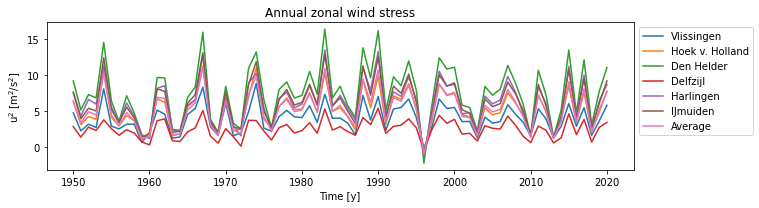

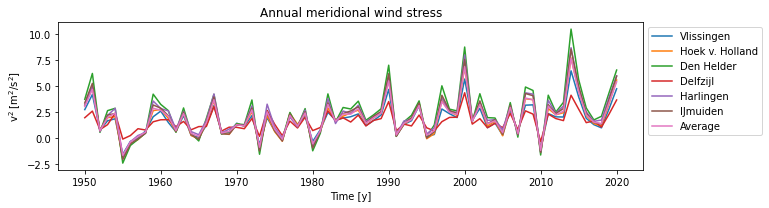

In [41]:
figs.plot_obs_wind_data(wind_data)

### Perform regression

In [42]:
results, timeseries = regres.regression_obs(wind_data, tg_data, wind_model = model)

In [43]:
results

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.753583,0.122120,0.105833,0.110234,2.428682,7.432840,1.416112,0.155899,3.951312
Hoek v. Holland,0.875028,0.131467,0.153222,0.085556,2.296615,10.099787,2.404671,-0.316011,5.682024
Den Helder,0.775503,0.302697,0.290496,0.105378,2.410949,6.437163,2.464924,0.136922,3.562110
Delfzijl,0.831894,0.258628,0.250220,0.137090,2.625642,7.702764,2.839116,0.131241,4.931763
Harlingen,0.762421,0.379219,0.359279,0.119279,2.631931,5.900536,2.969768,0.263950,3.402462
IJmuiden,0.743603,0.212516,0.189178,0.123495,2.591322,7.258273,1.990347,0.243336,3.794930
Average,0.839273,0.241042,0.235319,0.118692,2.157774,7.472407,2.363966,0.064965,4.230608


In [44]:
timeseries

Vlissingen                                          Hoek v. Holland  \
          u$^2$     v$^2$     trend     total wind total           u$^2$   
time                                                                       
1950   0.590414  0.109795 -6.748150 -6.047941   0.700210        1.102852   
1951  -1.269362  0.266152 -6.555346 -7.558557  -1.003211       -1.922732   
1952  -0.586283 -0.102295 -6.362542 -7.051119  -0.688578       -0.892481   
1953  -0.916554 -0.005402 -6.169737 -7.091693  -0.921956       -1.238235   
1954   3.050812  0.015512 -5.976933 -2.910609   3.066324        5.043063   
...         ...       ...       ...       ...        ...             ...   
2016  -0.785824  0.020188  5.976933  5.211297  -0.765636       -1.671612   
2017   1.115557 -0.045455  6.169737  7.239839   1.070102        2.260503   
2018  -1.722034 -0.078360  6.362542  4.562148  -1.800394       -2.847268   
2019  -0.244998  0.117192  6.555346  6.427540  -0.127806       -0.292829   
2020   1.360473  0.325265  6.748150  8.433888   1.685738        2.399710   

                                                ...  IJmuiden            \
         v$^2$     trend      total wind total  ...     u$^2$     v$^2$   
time                                            ...                       
1950 -0.227150 -9.703903  -8.828201   0.875701  ...  0.922031  0.162680   
1951 -0.529829 -9.426648 -11.879210  -2.452561  ... -1.422636  0.397195   
1952  0.207185 -9.149394  -9.834689  -0.685296  ... -0.490742 -0.175374   
1953 -0.008095 -8.872140 -10.118469  -1.246330  ... -0.734155  0.016955   
1954 -0.025468 -8.594885  -3.577291   5.017595  ...  4.017776  0.034416   
...        ...       ...        ...        ...  ...       ...       ...   
2016 -0.046069  8.594885   6.877204  -1.717681  ... -1.484000  0.038888   
2017  0.093641  8.872140  11.226283   2.354144  ...  2.169079 -0.074230   
2018  0.132941  9.149394   6.435067  -2.714327  ... -2.298656 -0.091445   
2019 -0.249328  9.426648   8.884491  -0.542157  ... -0.049937  0.202563   
2020 -0.655817  9.703903  11.447796   1.743894  ...  1.938523  0.482872   

                                      Average                                \
         trend     total wind total     u$^2$     v$^2$     trend     total   
time                                                                          
1950 -6.481078 -5.396367   1.084711  1.048559  0.040000 -7.225138 -6.136579   
1951 -6.295904 -7.321345  -1.025441 -1.696519  0.103430 -7.018706 -8.611795   
1952 -6.110730 -6.776846  -0.666116 -0.293165 -0.049335 -6.812273 -7.154773   
1953 -5.925557 -6.642757  -0.717200 -0.709118  0.000232 -6.605841 -7.314727   
1954 -5.740383 -1.688190   4.052193  4.415575  0.015821 -6.399408 -1.968012   
...        ...       ...        ...       ...       ...       ...       ...   
2016  5.740383  4.295271  -1.445112 -1.603300  0.009299  6.399408  4.805407   
2017  5.925557  8.020406   2.094849  2.584654 -0.017389  6.605841  9.173106   
2018  6.110730  3.720629  -2.390101 -2.823249 -0.022502  6.812273  3.966522   
2019  6.295904  6.448531   0.152627  0.012916  0.054137  7.018706  7.085759   
2020  6.481078  8.902473   2.421395  2.183802  0.131172  7.225138  9.540112   

                 
     wind total  
time             
1950   1.088559  
1951  -1.593089  
1952  -0.342500  
1953  -0.708886  
1954   4.431396  
...         ...  
2016  -1.594001  
2017   2.567265  
2018  -2.845751  
2019   0.067053  
2020   2.314974  

[71 rows x 35 columns]

#### Plot results

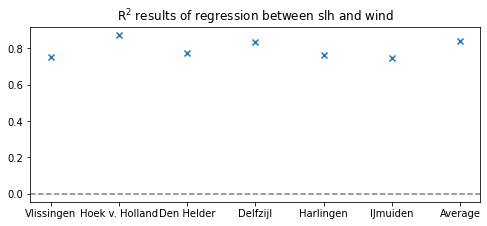

In [45]:
figs.plot_obs_result_per_station(results, 'R$^2$', model, data_type)

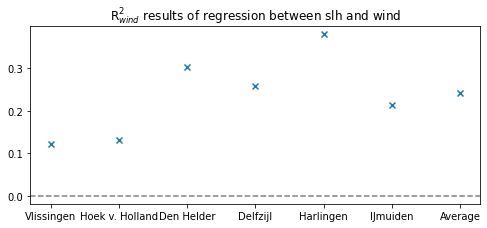

In [51]:
figs.plot_obs_result_per_station(results, 'R$^2_{wind}$', model, data_type)

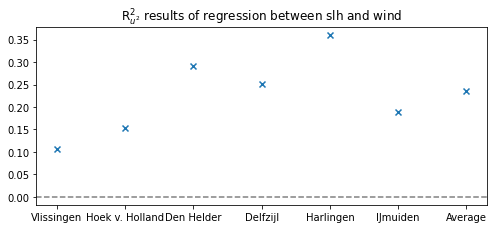

In [52]:
figs.plot_obs_result_per_station(results,'R$^2_{u^2}$', model, data_type)

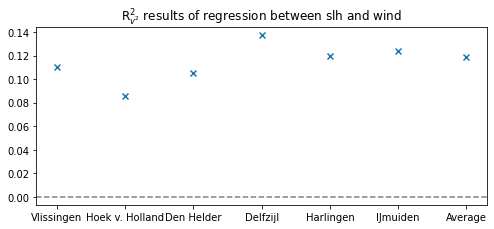

In [53]:
figs.plot_obs_result_per_station(results, 'R$^2_{v^2}$', model, data_type)

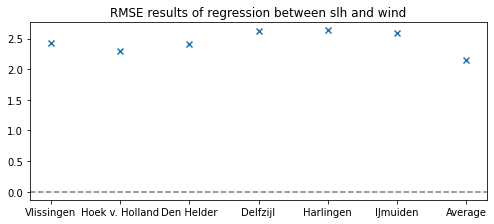

In [46]:
figs.plot_obs_result_per_station(results, 'RMSE', model, data_type)

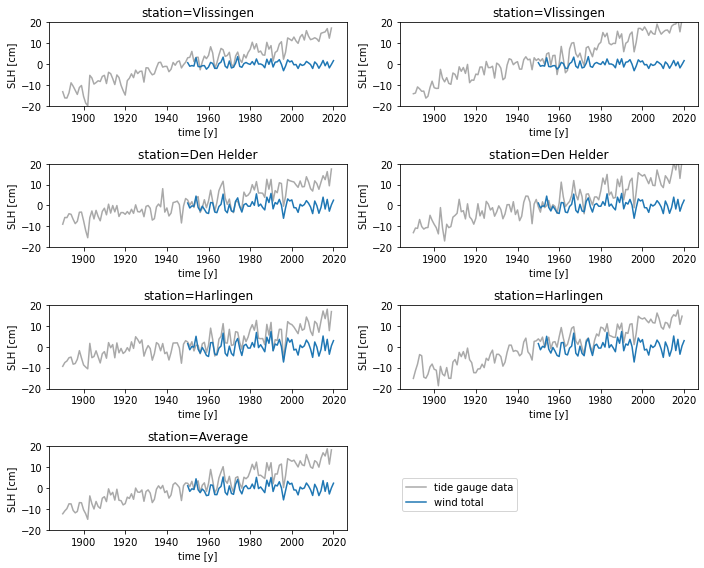

In [47]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['wind total'], model, data_type)

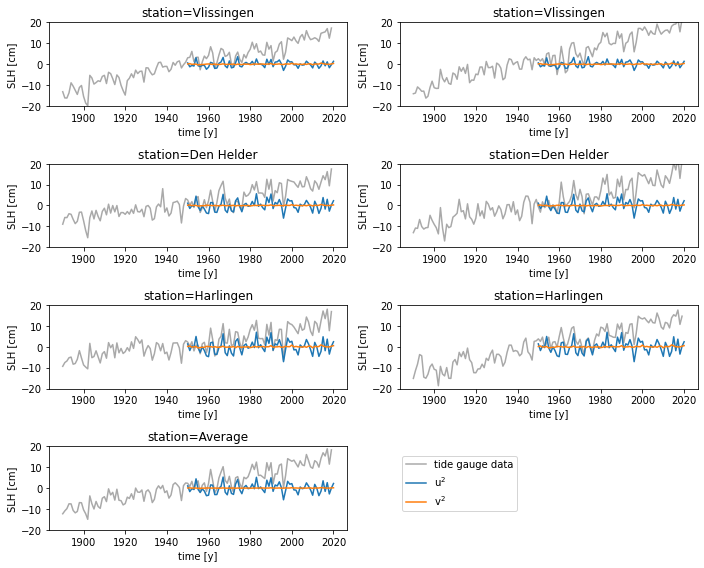

In [49]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['u$^2$', 'v$^2$'], model, data_type)

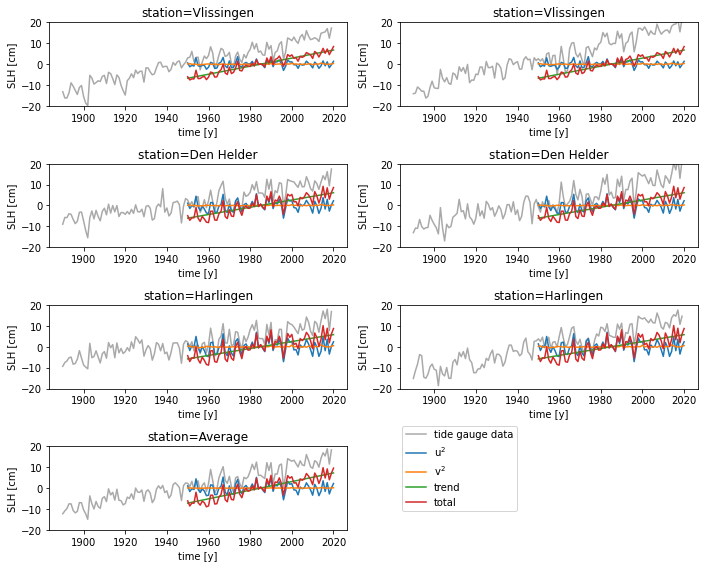

In [54]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['u$^2$', 'v$^2$', 'trend', 'total'], model, data_type)